In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import json

In [3]:
np.load("../ckpts/gsm8k_aug_llama2_rand_20000/train_aug_answer_types5_seed3.npy")==0

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True, False,  True,  True],
       ...,
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [False, False, False, False, False]])

In [14]:
with open('../data/GSM8k_aug/AugGSM8K_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/GSM8k_aug/AugGSM8K_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [15]:
NUM_TRAIN_POINTS=20000

ratios_all_testeasy = []

CKPT_NAME=f"gsm8k_aug_llama2_rand_20000"

subsample_idxs = np.load("../ckpts/"+CKPT_NAME+"/subsample_idxs.npy")



train_correct = np.load("../ckpts/"+CKPT_NAME+"/train_aug_answer_types5_seed3.npy")==0
train_samples = np.load("../ckpts/"+CKPT_NAME+"/train_aug_answers5_seed3.npy")
# hard_subsample = np.where(np.isin(subsample_idxs, hard_train_idxs))[0]

num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

for input_idx in range(len(subsample_idxs)):
    num_memorized = 0
    num_correct_different = 0
    num_incorrect = 0
    for sample_idx in range(5):
        correct = train_correct[input_idx, sample_idx]
        if correct:
            if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                num_memorized+=1
            else:
                num_correct_different+=1
        else:
            num_incorrect+=1 
    num_memorized_all.append(num_memorized)
    num_correct_different_all.append(num_correct_different)
    num_incorrect_all.append(num_incorrect)

num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

/tmp/ipykernel_3133/4258477956.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist(num_memorized_all/(num_memorized_all+num_correct_different_all))


(array([11121.,     0.,  1317.,   149.,   812.,   963.,    77.,   108.,
          632.,   960.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

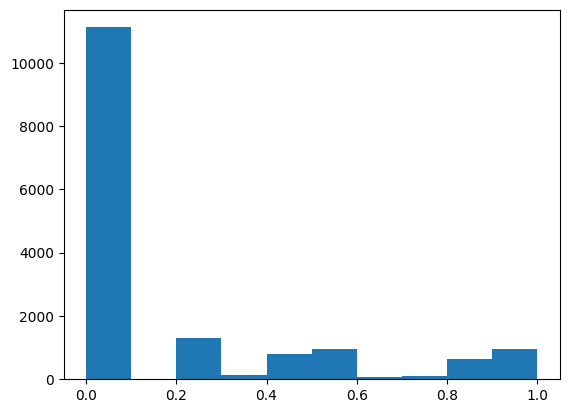

In [24]:
plt.hist(num_memorized_all/(num_memorized_all+num_correct_different_all))

In [13]:
len(train_samples)

20000

In [4]:
np.load("../ckpts/gsm8k_aug_llama2_rand_20000/train_aug_answers5_seed3.npy")

array([["  First, let's calculate the total number of dolls in the big boxes and the small boxes.\n\nThere are 5 big boxes, and each big box contains 7 dolls, so the total number of dolls in the big boxes is 5 * 7 = 35 dolls.\n\nThere are 9 small boxes, and each small box contains 4 dolls, so the total number of dolls in the small boxes is 9 * 4 = 36 dolls.\n\nAdding these two amounts together, the total number of dolls is 35 + 36 = 71 dolls.\n\nJames wants to donate an additional 20 dolls, so the number of dolls he will donate is 20.\nThe answer is: $20$",
        "  First, let's calculate the total number of dolls in the big boxes. There are 5 big boxes, and each big box contains 7 dolls, so the total number of dolls in the big boxes is 5 * 7 = 35 dolls.\nNext, let's calculate the total number of dolls in the small boxes. There are 9 small boxes, and each small box contains 4 dolls, so the total number of dolls in the small boxes is 9 * 4 = 36 dolls.\nAdding these two amounts togethe